# Finding Heavy Traffic Indicators on I-94

The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

In [1]:
import pandas as pd

traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [2]:
traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [3]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

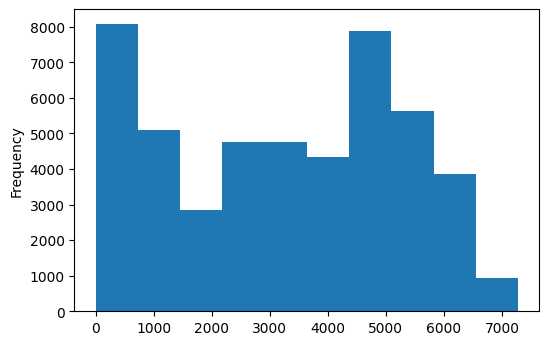

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

traffic['traffic_volume'].plot.hist()
traffic['traffic_volume'].describe()

In looking at a description of the data and the histogram, it interestingly shows that the variation between the traffic at the 25th percentile and the 75th percentile increases the traffic count by more than 4 times. This wide of variance is likely due to differences between daytime and nighttime traffic. 

## Traffic Volume: Day Vs. Night

We'll begin by separating out the nighttime and daytime traffic into separate dataframes. 

In [5]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

daytime_traffic = traffic[traffic['date_time'].dt.hour.between(7,18)]
nighttime_traffic = traffic[(traffic['date_time'].dt.hour < 7) | (traffic['date_time'].dt.hour > 18)]

print(daytime_traffic.shape)
print(nighttime_traffic.shape)



(23877, 9)
(24327, 9)


Now that we have the two timeframes separated out into their own dataframes, let us plot both on histograms. 

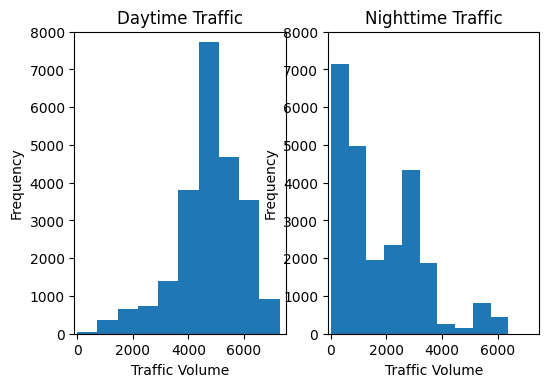

In [6]:
plt.figure()
plt.subplot(1,2,1)
plt.hist(daytime_traffic['traffic_volume'])
plt.title('Daytime Traffic')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.xlim(-100, 7500)
plt.ylim(0, 8000)

plt.subplot(1,2,2)
plt.hist(nighttime_traffic['traffic_volume'])
plt.title('Nighttime Traffic')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.xlim(-100, 7500)
plt.ylim(0, 8000)

plt.show()

Now that we have these plotted we can also take a look at the data. 

In [7]:
daytime_traffic['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [8]:
nighttime_traffic['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The daytime traffic histogram skews to the left, indciating that this data mostly shows high levels of traffic. Conversely, the nighttime traffic histogram skews right, meaning it is relatively light on traffic. This is also borne out in the middle 50% of both sets of data, as it is 2 to 3 times lower for the nighttime traffic.

Since we are looking to find indicators of heavy traffic we should continue our analysis with the daytime traffic only. 

## Time and its Influence on Traffic

With the focus on the daytime traffic, let's look a little closer and see if the month, day of the week, or time of the day has some influence on the volume of traffic. To examine the month's effect, we'll need to create a new column for that. 

In [9]:
daytime_traffic['month'] = daytime_traffic['date_time'].dt.month
by_month = daytime_traffic.groupby('month').mean()
by_month['traffic_volume']

<ipython-input-9-635c804b47ae>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

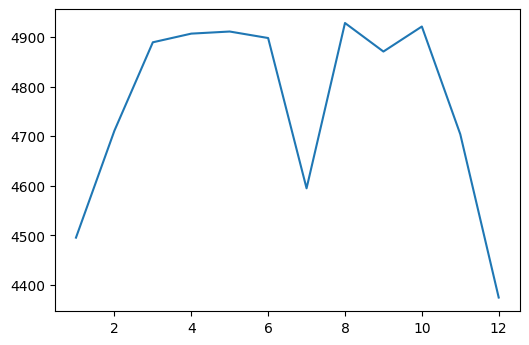

In [10]:
plt.plot(by_month['traffic_volume'])
plt.show()

The traffic appears to be lower during the winter months. The exception to this is the moth of July, which also shows a serious drop in average traffic. 

### Day of the Week

Next we can take a look at the day of the week and the influence on traffic. 

In [13]:
daytime_traffic['dayofweek'] = daytime_traffic['date_time'].dt.dayofweek
by_dayofweek = daytime_traffic.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

<ipython-input-13-75beb36b9512>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

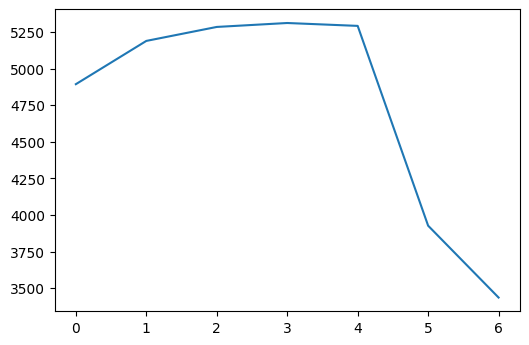

In [14]:
plt.plot(by_dayofweek['traffic_volume'])
plt.show()

Unsurprisingly, the weekend days (5 = Saturday, 6 = Sunday) have reduced average traffic by just under 2000 vehicles. 

### Time of Day

Next we'll examine the time of day and its effect on traffic. We will exclude the weekends since the traffic is dramatically less then.

In [16]:
daytime_traffic['hour'] = daytime_traffic['date_time'].dt.hour
bussiness_days = daytime_traffic.copy()[daytime_traffic['dayofweek'] <= 4] # 4 == Friday
weekend = daytime_traffic.copy()[daytime_traffic['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


<ipython-input-16-f3f666925a13>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(0.0, 6500.0)

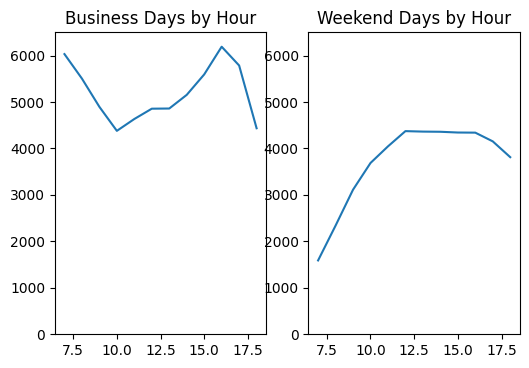

In [18]:
plt.figure()
plt.subplot(1,2,1)
plt.plot(by_hour_business['traffic_volume'])
plt.title('Business Days by Hour')
plt.ylim(0, 6500)

plt.subplot(1,2,2)
plt.plot(by_hour_weekend['traffic_volume'])
plt.title('Weekend Days by Hour')
plt.ylim(0, 6500)

The traffic on the business days is clearly higher overall as compared to the weekend. Peak traffic hours on business days is 7 am and 4 pm.

Overall it is clear the busiest times for traffic are:

- Summer months (save for July)
- Business Days
- The daily commute hours of 7 am and 6 pm

## Weather Indicators

Next we can take a look at weather and its effects on the traffic volume.

In [21]:
daytime_traffic.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

Temperature has the strongest correlation with traffic volume, but it is not terribly strong at just 0.128. We can plot this on a scatter plot to get a sense of this correlation. 

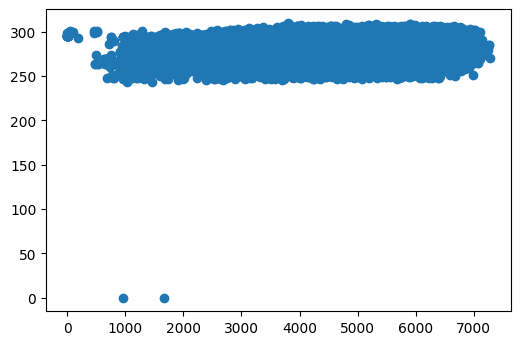

In [23]:
plt.scatter(daytime_traffic['traffic_volume'], daytime_traffic['temp'])
plt.show()

Even with this strongest correlated variable, weather indicators do not appear to be strong predictors of traffic.

## Weather Types

Next we can take a look at whether traffic volume is meaningfully affected by the type of weather.

In [25]:
by_weather_main = daytime_traffic.groupby('weather_main').mean()
by_weather_description = daytime_traffic.groupby('weather_description').mean()

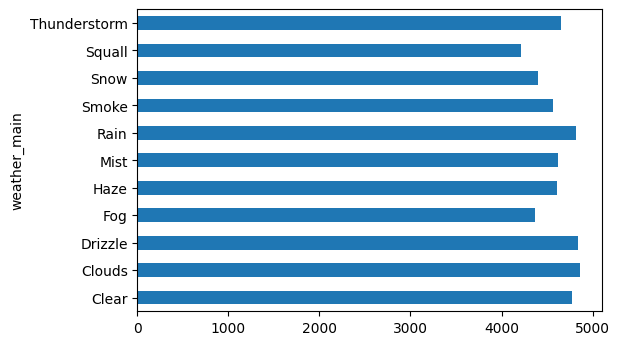

In [26]:
by_weather_main['traffic_volume'].plot.barh()

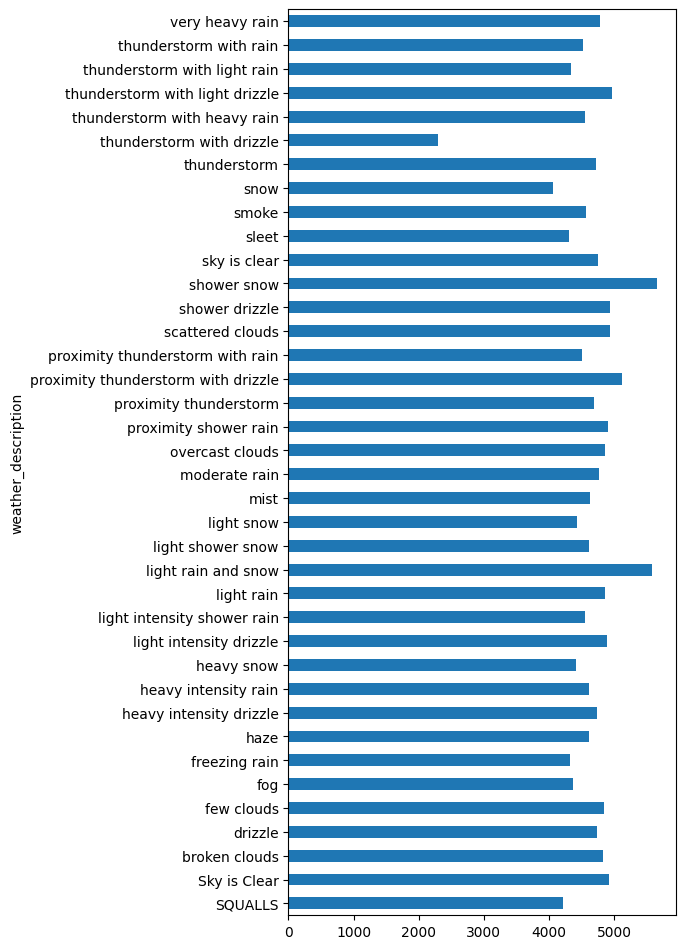

In [30]:
plt.figure(figsize=(5,12))
by_weather_description['traffic_volume'].plot.barh()


Looking at both plots, it looks like 'light rain and snow' and 'shower snow' are the two indicators that push the traffic volume over 5,000. Thunderstorm and drizzle also pushes the average traffic just over 5,000. 

# Conclusions

After examining the data we can make the following statements about the traffic volume.

- Traffic volume is heaviest during the summer months, with an exception in July.
- Daytime traffic is significantly heavier than night time traffic.
- The heaviest traffic during the daytime occurs during the commute hours of 7 am and 5 pm. 

Weather did not have a significant effect on the volume of traffic. The three weather events that did push traffic volume over 5,000 were light rain and snow, shower snow, and thunderstorm and rizzle. 